## Trying Decision Trees and Random Forests

### Loading packages and importing case study data

In [1]:
import numpy as np # For numerical computation
import pandas as pd # For data wrangling
import matplotlib.pyplot as plt # Plotting package
%matplotlib inline
import matplotlib as mpl # plotting functionality 
mpl.rcParams['figure.dpi'] = 400 # High resolution figures
import graphviz

In [2]:
df = pd.read_csv("CaseStudyFile/Chapter_1_cleaned_data.csv")

In [3]:
features_response = df.columns.to_list()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                   'PAY_6', 'EDUCATION_CAT', 'graduate school',
                   'high school', 'none','others', 'university']

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [6]:
dt = DecisionTreeClassifier(max_depth = 2)

In [7]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [8]:
# Export the train model
dot_data = tree.export_graphviz(dt, out_file = None, filled = True, rounded = True, feature_names = features_response[:-1], proportion = True, class_names = ['Not defaulted', 'Defaulted'])

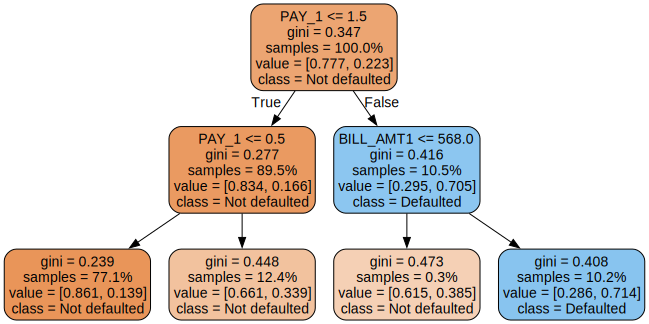

In [9]:
graph = graphviz.Source(dot_data)
graph

In [10]:
features_response[:-1].index('PAY_1')

4

In [11]:
X_train.shape

(21331, 17)

In [12]:
(X_train[:,4] <= 1.5).sum() / X_train.shape[0]

0.8946134733486475

In [13]:
# Class fraction for the training set
y_train.mean()

0.223102526838873

### Training the Decision tree

In [14]:
pm0 = np.linspace(0.01, 0.99, 99)
pm1 = 1 - pm0

In [15]:
misclassification_rate = np.minimum(pm0, pm1)

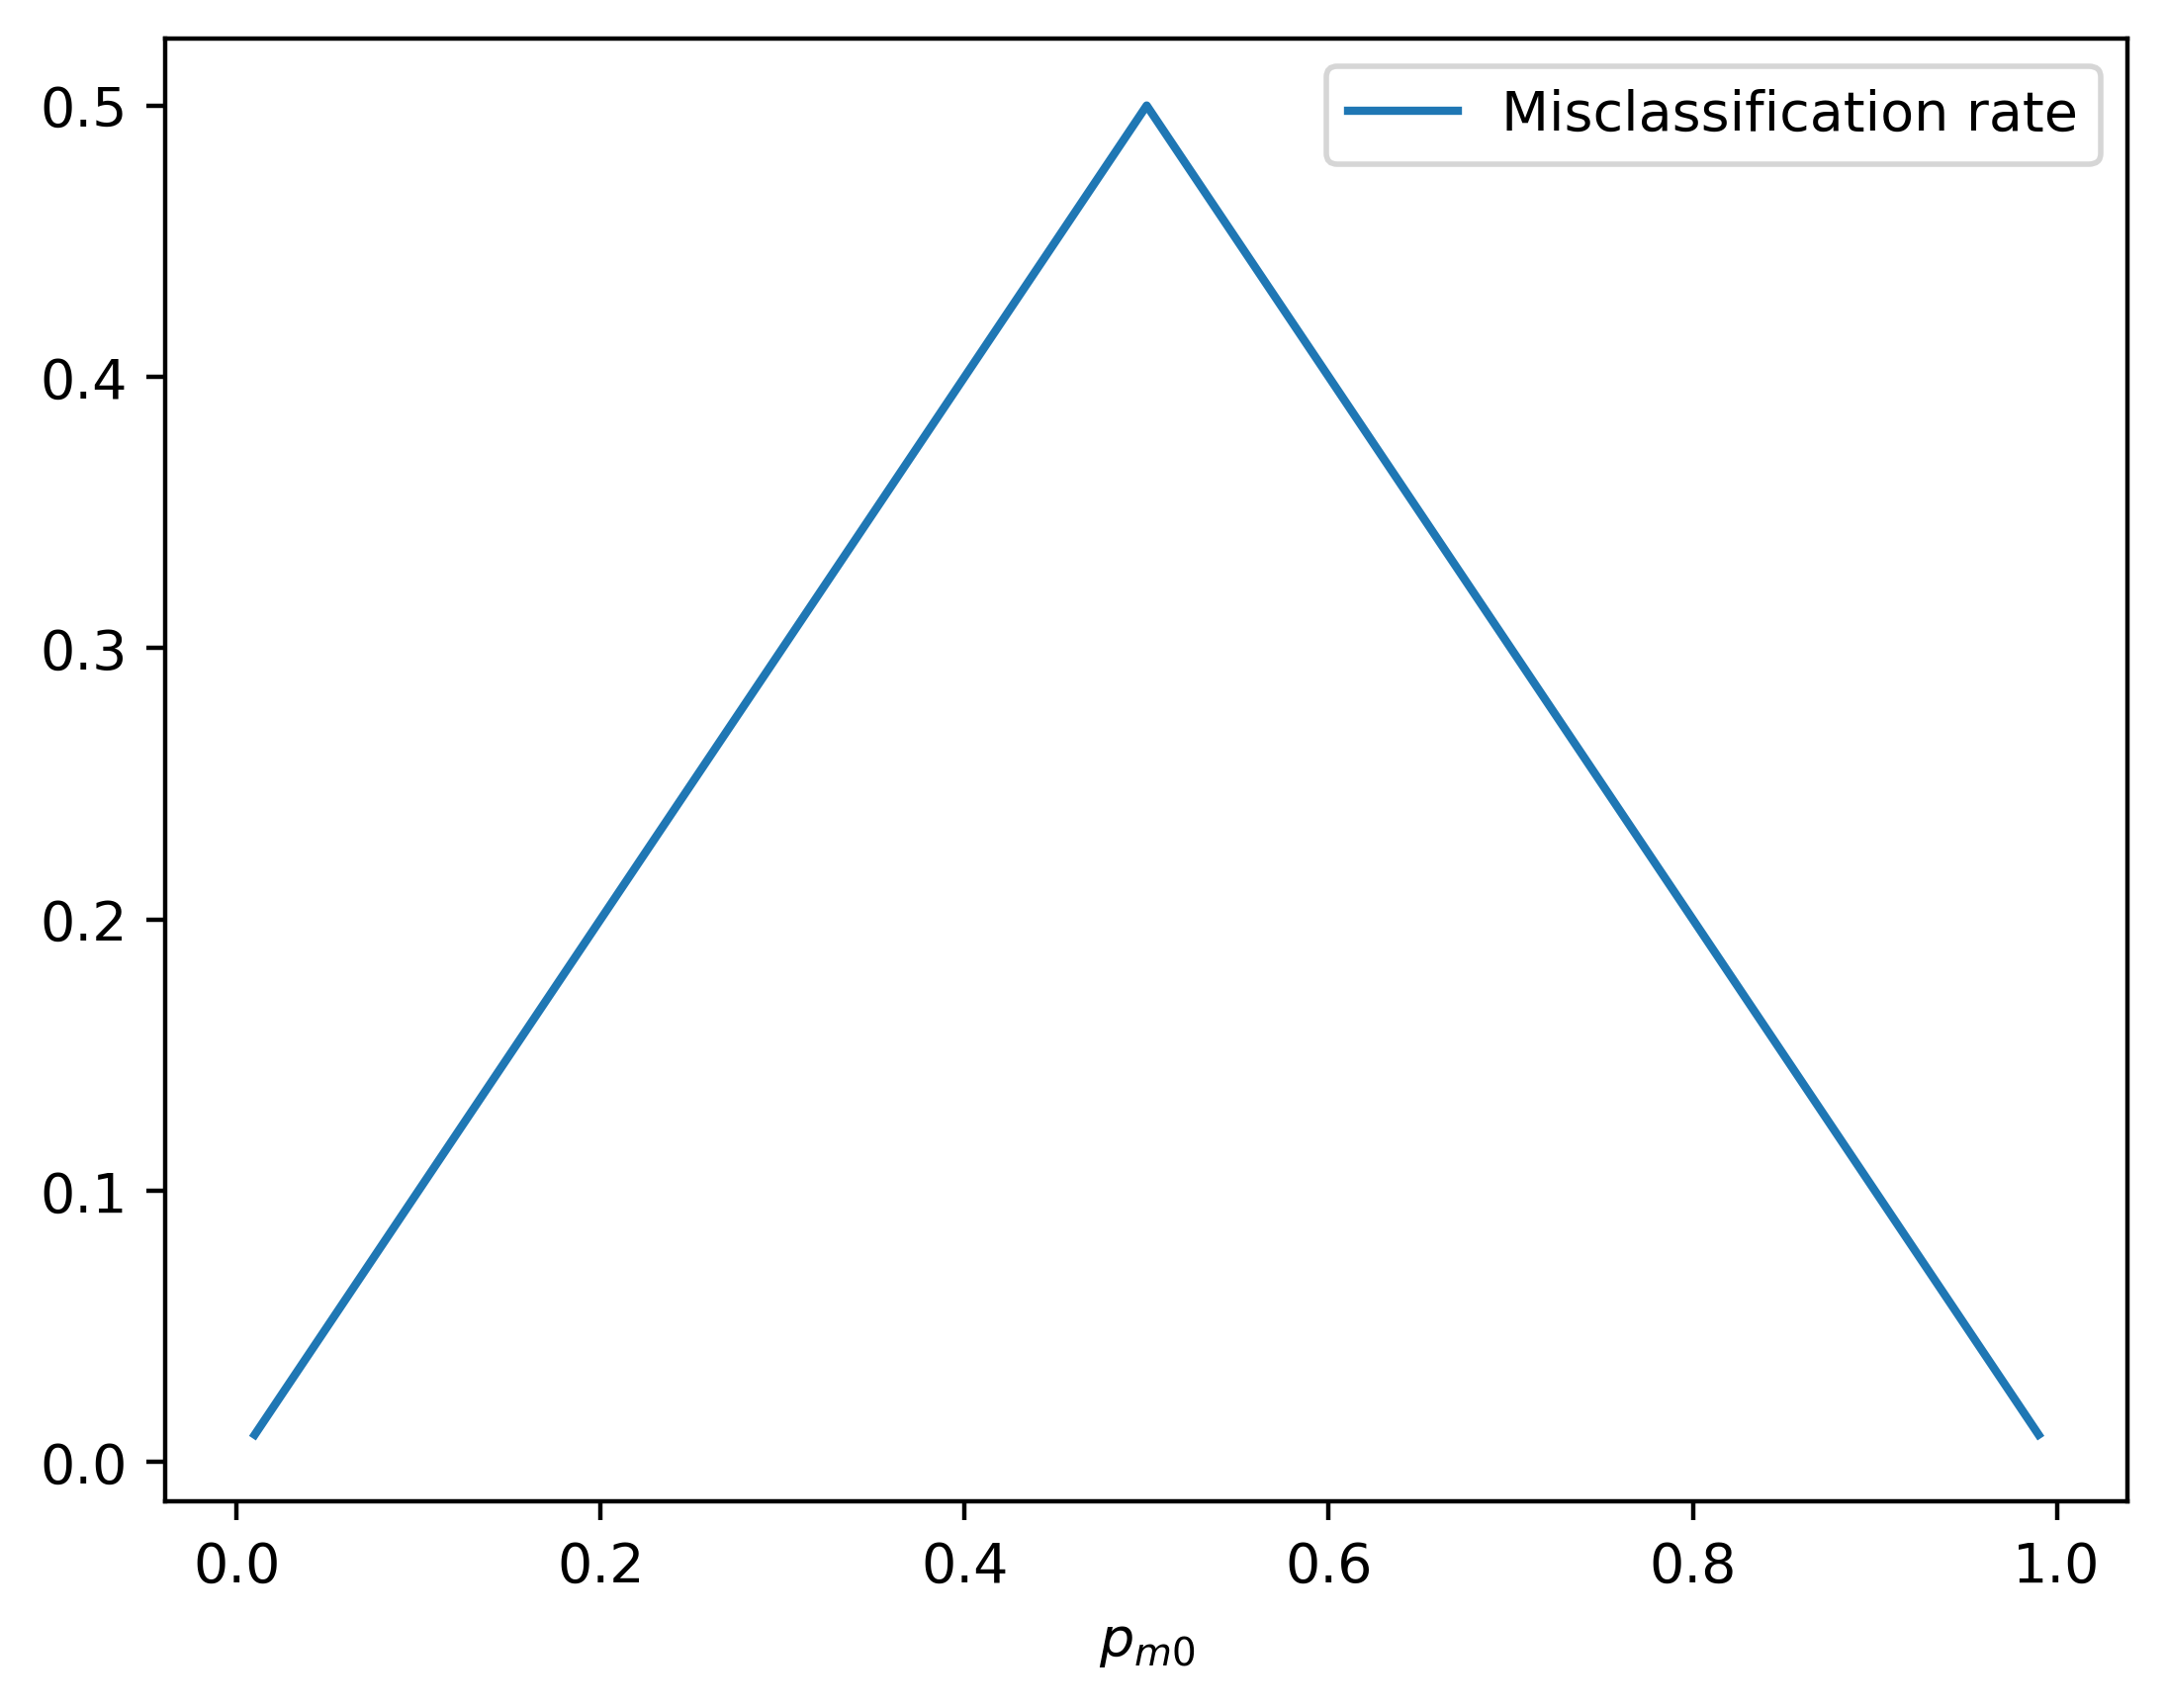

In [16]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()
plt.show()

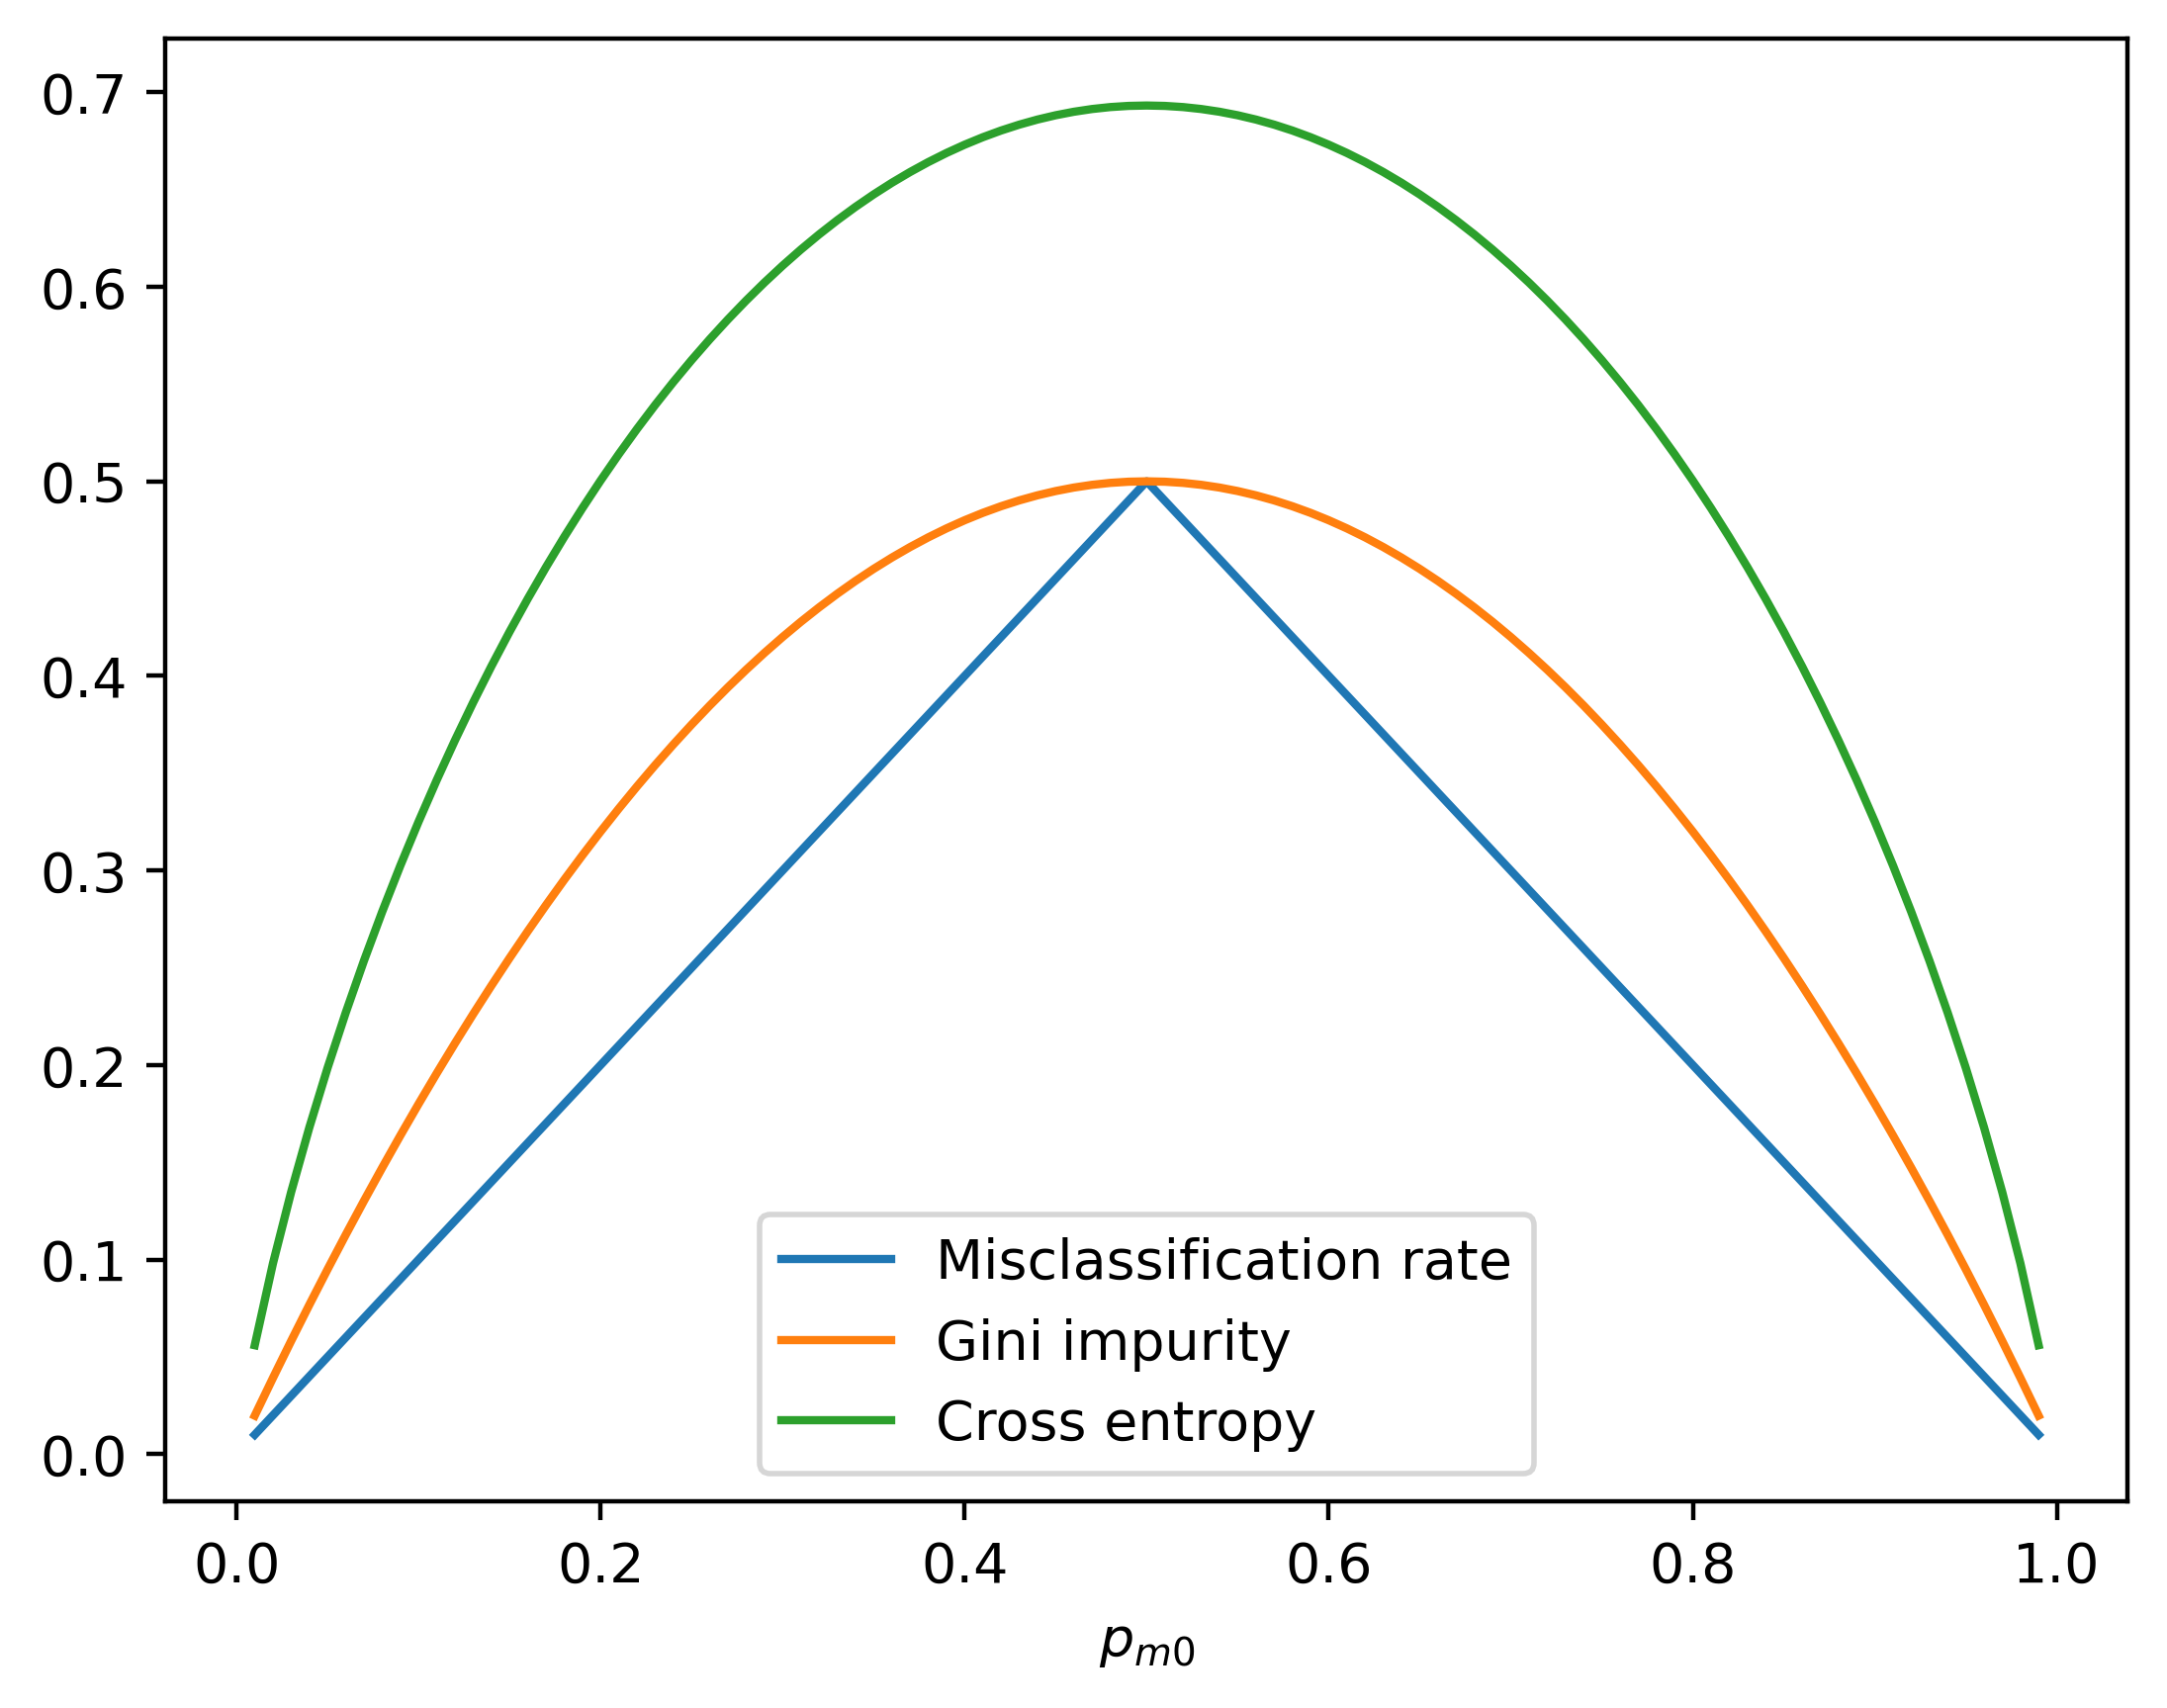

In [17]:
gini = (pm0 * (1 - pm0)) + (pm1 * (1 - pm1)) # Calculate node inpurity
cross_ent = -1 * ((pm0 * np.log(pm0)) + pm1 * np.log(pm1)) 

mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')
plt.xlabel('$p_{m0}$')
plt.legend()
plt.show()

#### Finding the optimal hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
X_train.shape

(21331, 17)

In [20]:
# Define a range of values to consider for the max_depth hyperparameter
params = {'max_depth':[1,2,4,6,8,10,12]}

In [21]:
#Instantiate the GridSearchCV class 
cv = GridSearchCV(dt, param_grid = params, scoring = 'roc_auc', n_jobs = None,      refit = True, cv = 4, verbose = 1, pre_dispatch = '2*n_jobs', error_score = np.nan, return_train_score = True)

In [22]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [23]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.043224,0.007657,0.021834,0.027602,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.082701,0.024638,0.004499,0.001498,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.111674,0.002952,0.003998,0.001732,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.217119,0.041449,0.006496,0.003276,6,{'max_depth': 6},0.744076,0.745757,0.752120,0.740677,0.745658,0.004156,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.235359,0.034140,0.003749,0.000433,8,{'max_depth': 8},0.728788,0.731886,0.752385,0.730337,0.735849,0.009610,3,0.811811,0.808353,0.803625,0.802413,0.806551,0.003762
5,0.301577,0.015096,0.004998,0.000706,10,{'max_depth': 10},0.707121,0.701715,0.714906,0.709902,0.708411,0.004767,4,0.849310,0.854263,0.841177,0.836588,0.845335,0.006879
6,0.372536,0.052886,0.005497,0.000865,12,{'max_depth': 12},0.674304,0.658384,0.679414,0.679224,0.672832,0.008589,6,0.887980,0.903520,0.885513,0.875831,0.888211,0.009937


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HI\AppData\Local\Temp\ipykernel_3716\3159923829.py:2: SyntaxWarning: invalid escape sequence '\p'
  ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], yerr = cv_results_df['std_train_score'] / np.sqrt(4), label = 'Mean $\pm$ 1 SE training scores')
C:\Users\HI\AppData\Local\Temp\ipykernel_3716\3159923829.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], yerr = cv_results_df['std_test_score'] / np.sqrt(4), label = 'Mean $\pm$ 1 SE testing scores')


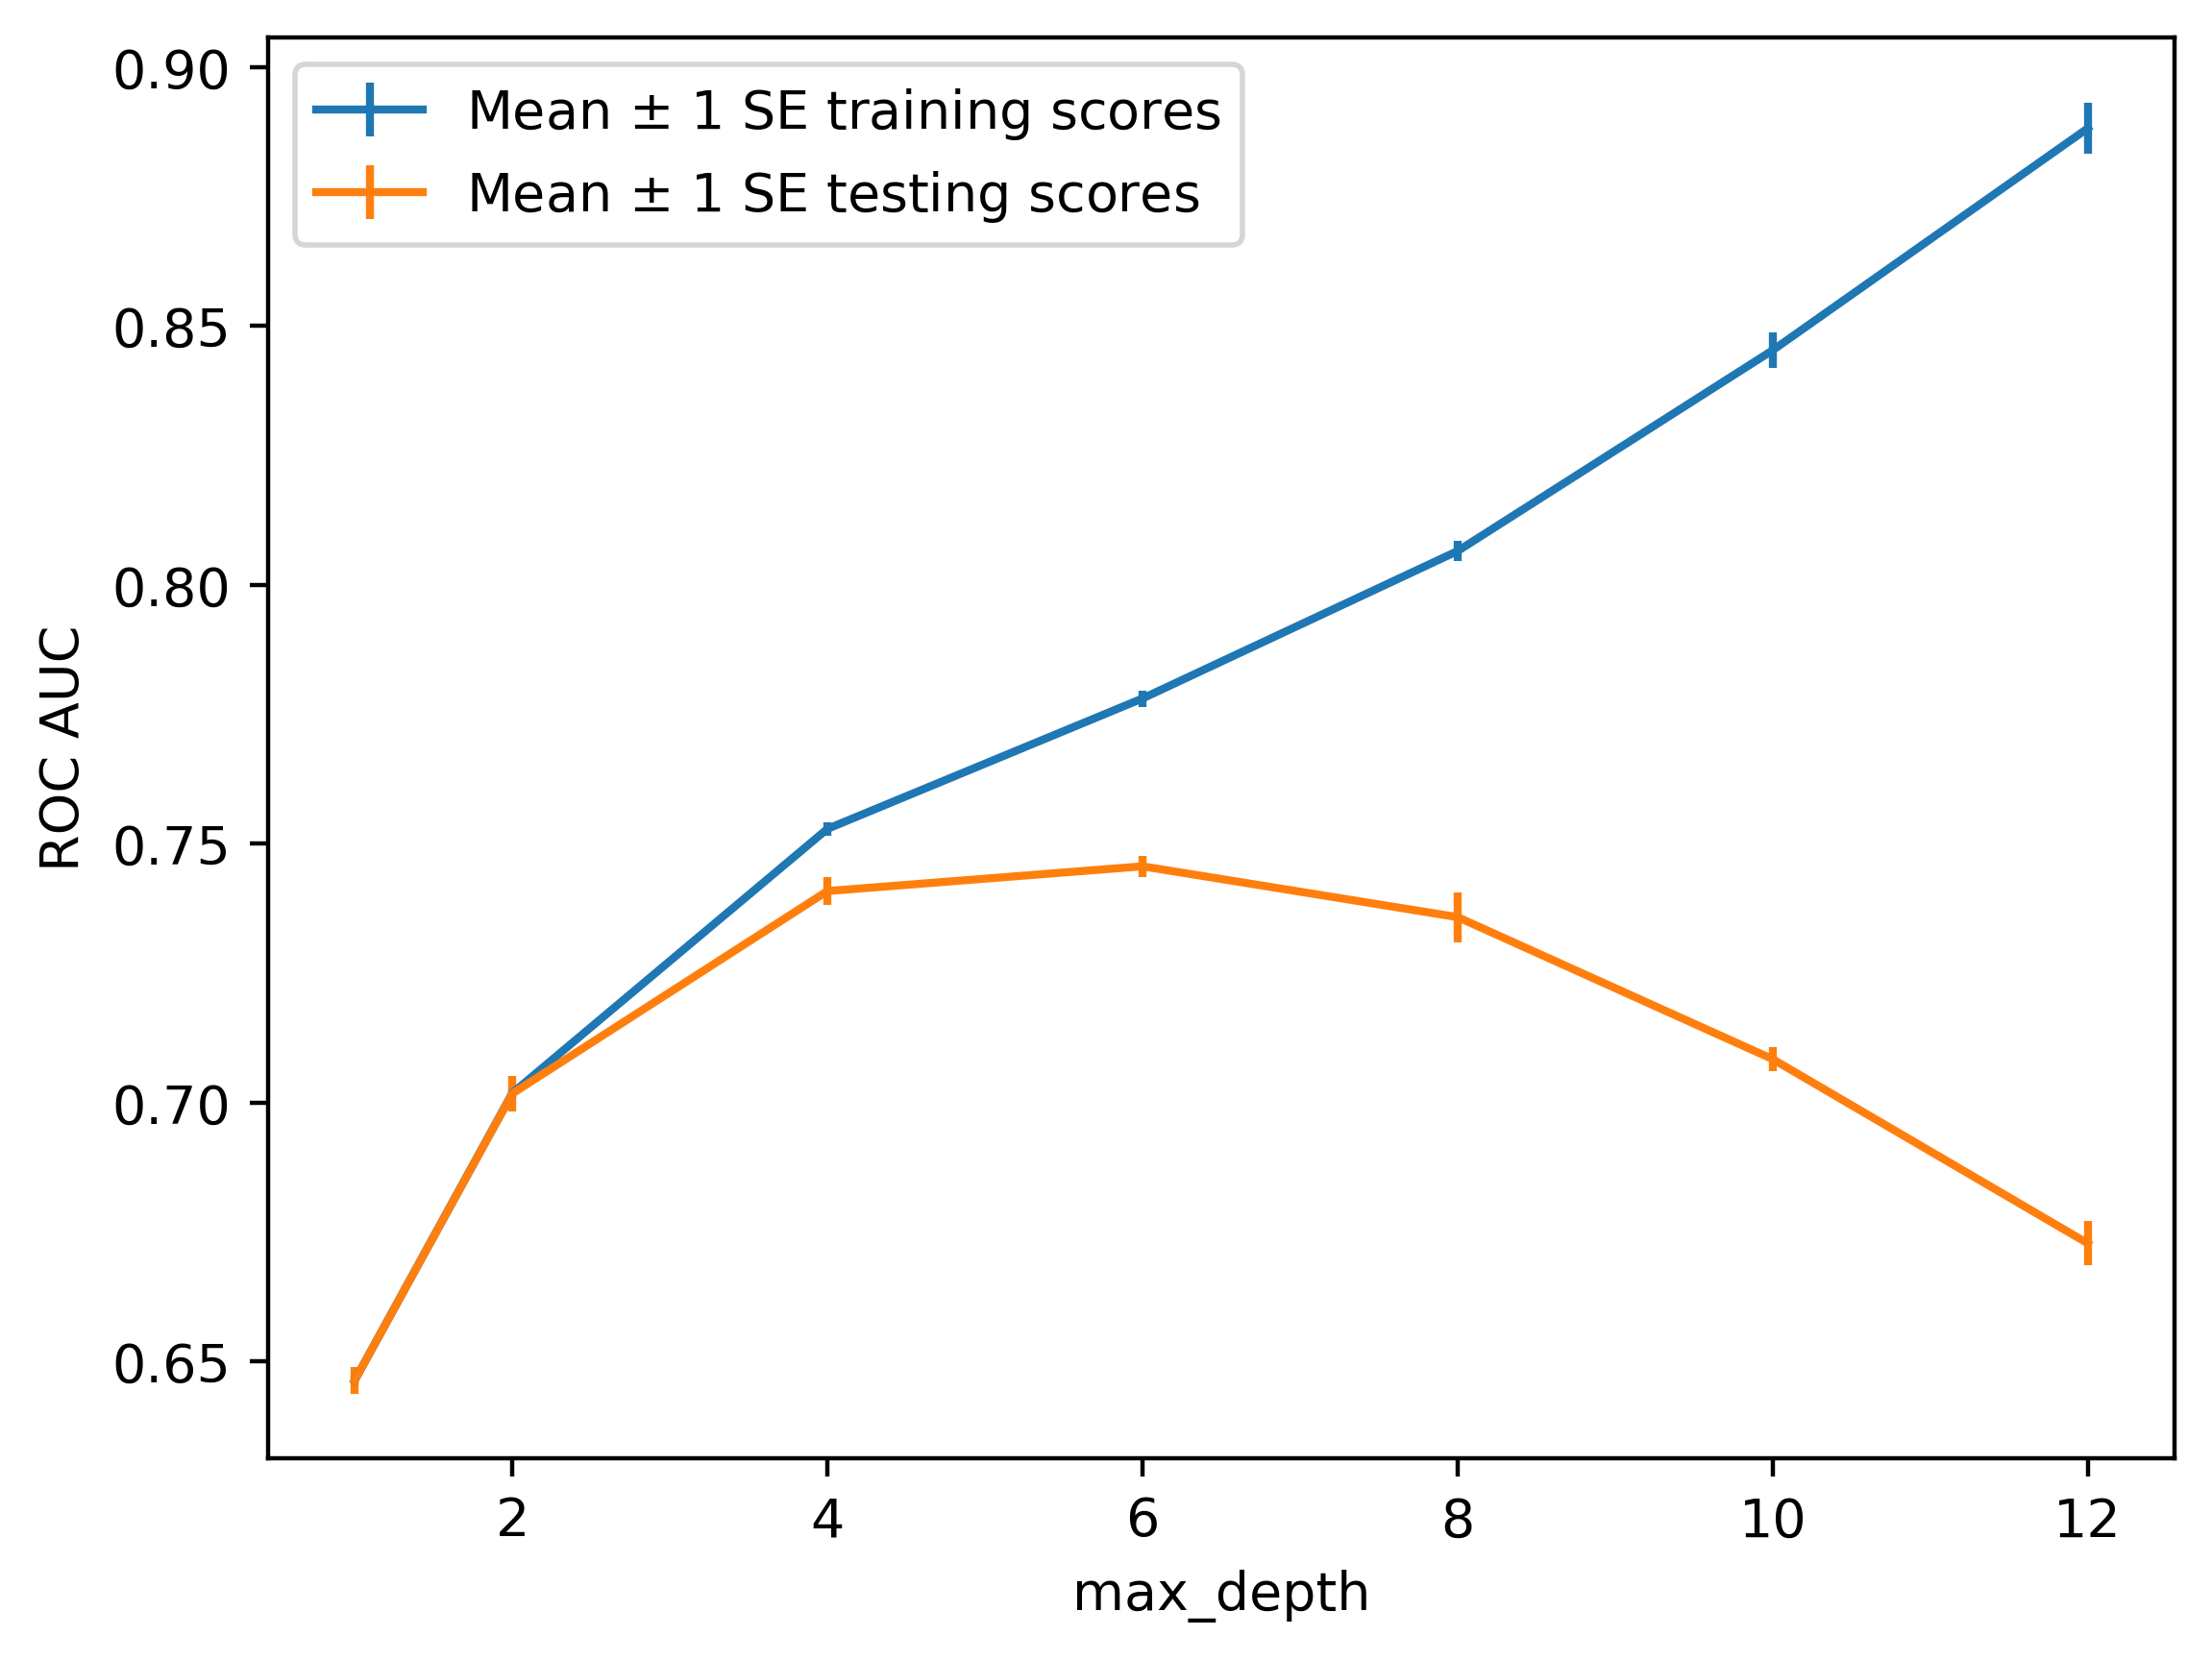

In [24]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'], yerr = cv_results_df['std_train_score'] / np.sqrt(4), label = 'Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'], yerr = cv_results_df['std_test_score'] / np.sqrt(4), label = 'Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

### Using Random Forests on the case study data

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 4, verbose = 0, warm_start = False, class_weight = None)

In [27]:
rf_params_ = {'n_estimators':list(range(10, 110, 10))}

In [28]:
cv_rf_ = GridSearchCV(rf, param_grid = rf_params_, scoring = 'roc_auc', n_jobs = None, refit = True, cv = 4, verbose = 1, pre_dispatch = '2*n_jobs', error_score = np.nan, return_train_score = True)

In [29]:
cv_rf_.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, max_features=None,
                                              n_estimators=10, random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [30]:
cv_rf_results_df = pd.DataFrame(cv_rf_.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.043224,0.007657,0.021834,0.027602,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.082701,0.024638,0.004499,0.001498,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.111674,0.002952,0.003998,0.001732,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.217119,0.041449,0.006496,0.003276,6,{'max_depth': 6},0.744076,0.745757,0.752120,0.740677,0.745658,0.004156,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.235359,0.034140,0.003749,0.000433,8,{'max_depth': 8},0.728788,0.731886,0.752385,0.730337,0.735849,0.009610,3,0.811811,0.808353,0.803625,0.802413,0.806551,0.003762
5,0.301577,0.015096,0.004998,0.000706,10,{'max_depth': 10},0.707121,0.701715,0.714906,0.709902,0.708411,0.004767,4,0.849310,0.854263,0.841177,0.836588,0.845335,0.006879
6,0.372536,0.052886,0.005497,0.000865,12,{'max_depth': 12},0.674304,0.658384,0.679414,0.679224,0.672832,0.008589,6,0.887980,0.903520,0.885513,0.875831,0.888211,0.009937


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HI\AppData\Local\Temp\ipykernel_3716\2652157359.py:10: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


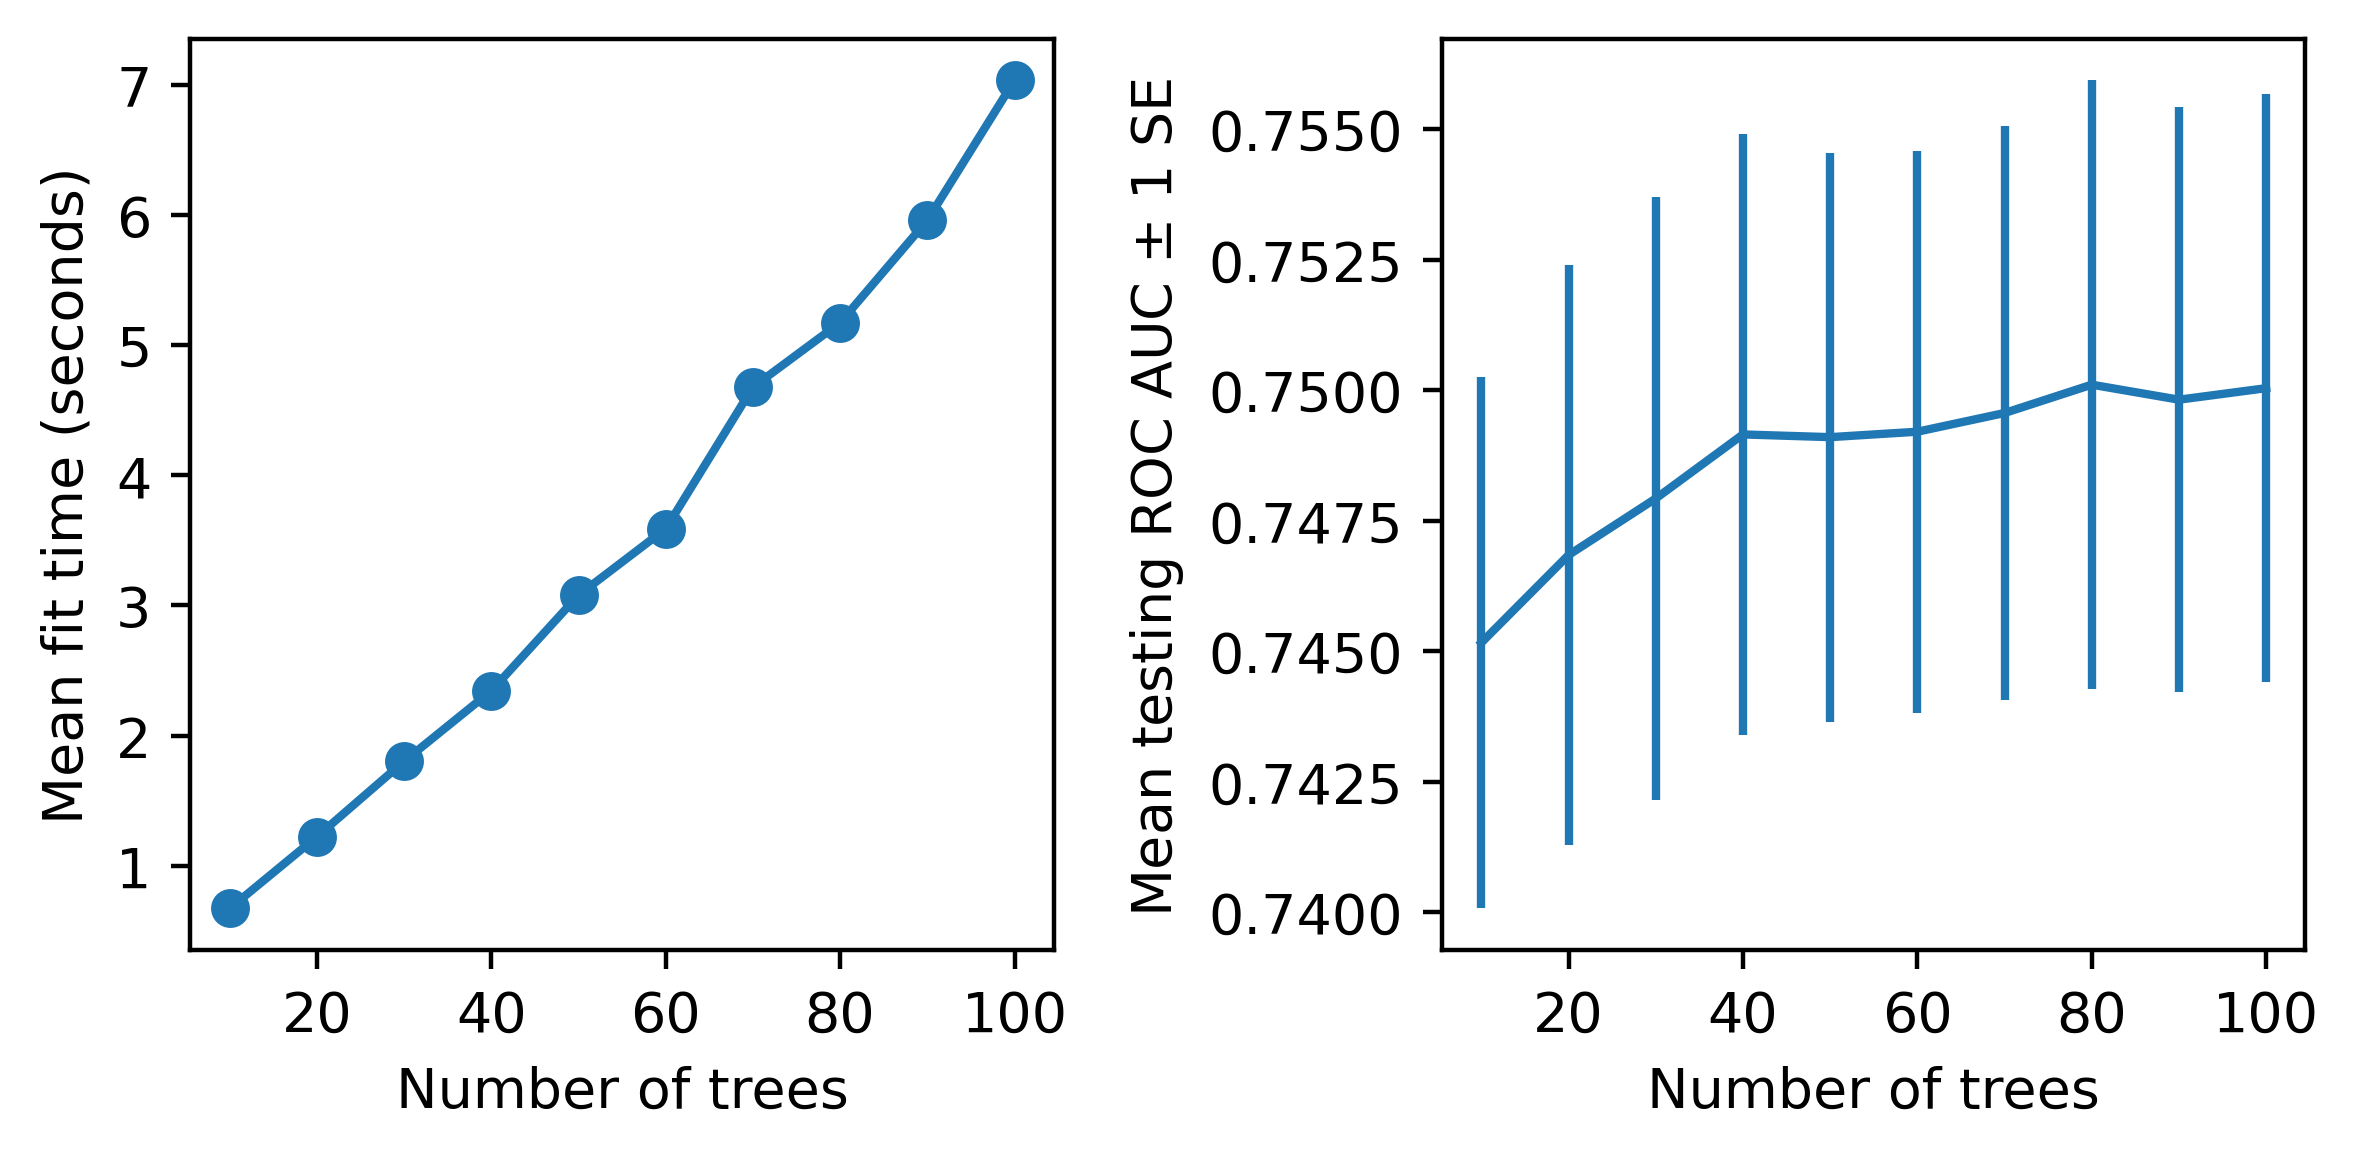

In [31]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3))
axs[0].plot(cv_rf_results_df['param_n_estimators'],
cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
cv_rf_results_df['mean_test_score'],
yerr = cv_rf_results_df['std_test_score'] / np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HI\AppData\Local\Temp\ipykernel_3716\505121609.py:10: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean training ROC AUC $\pm$ 1 SE ')


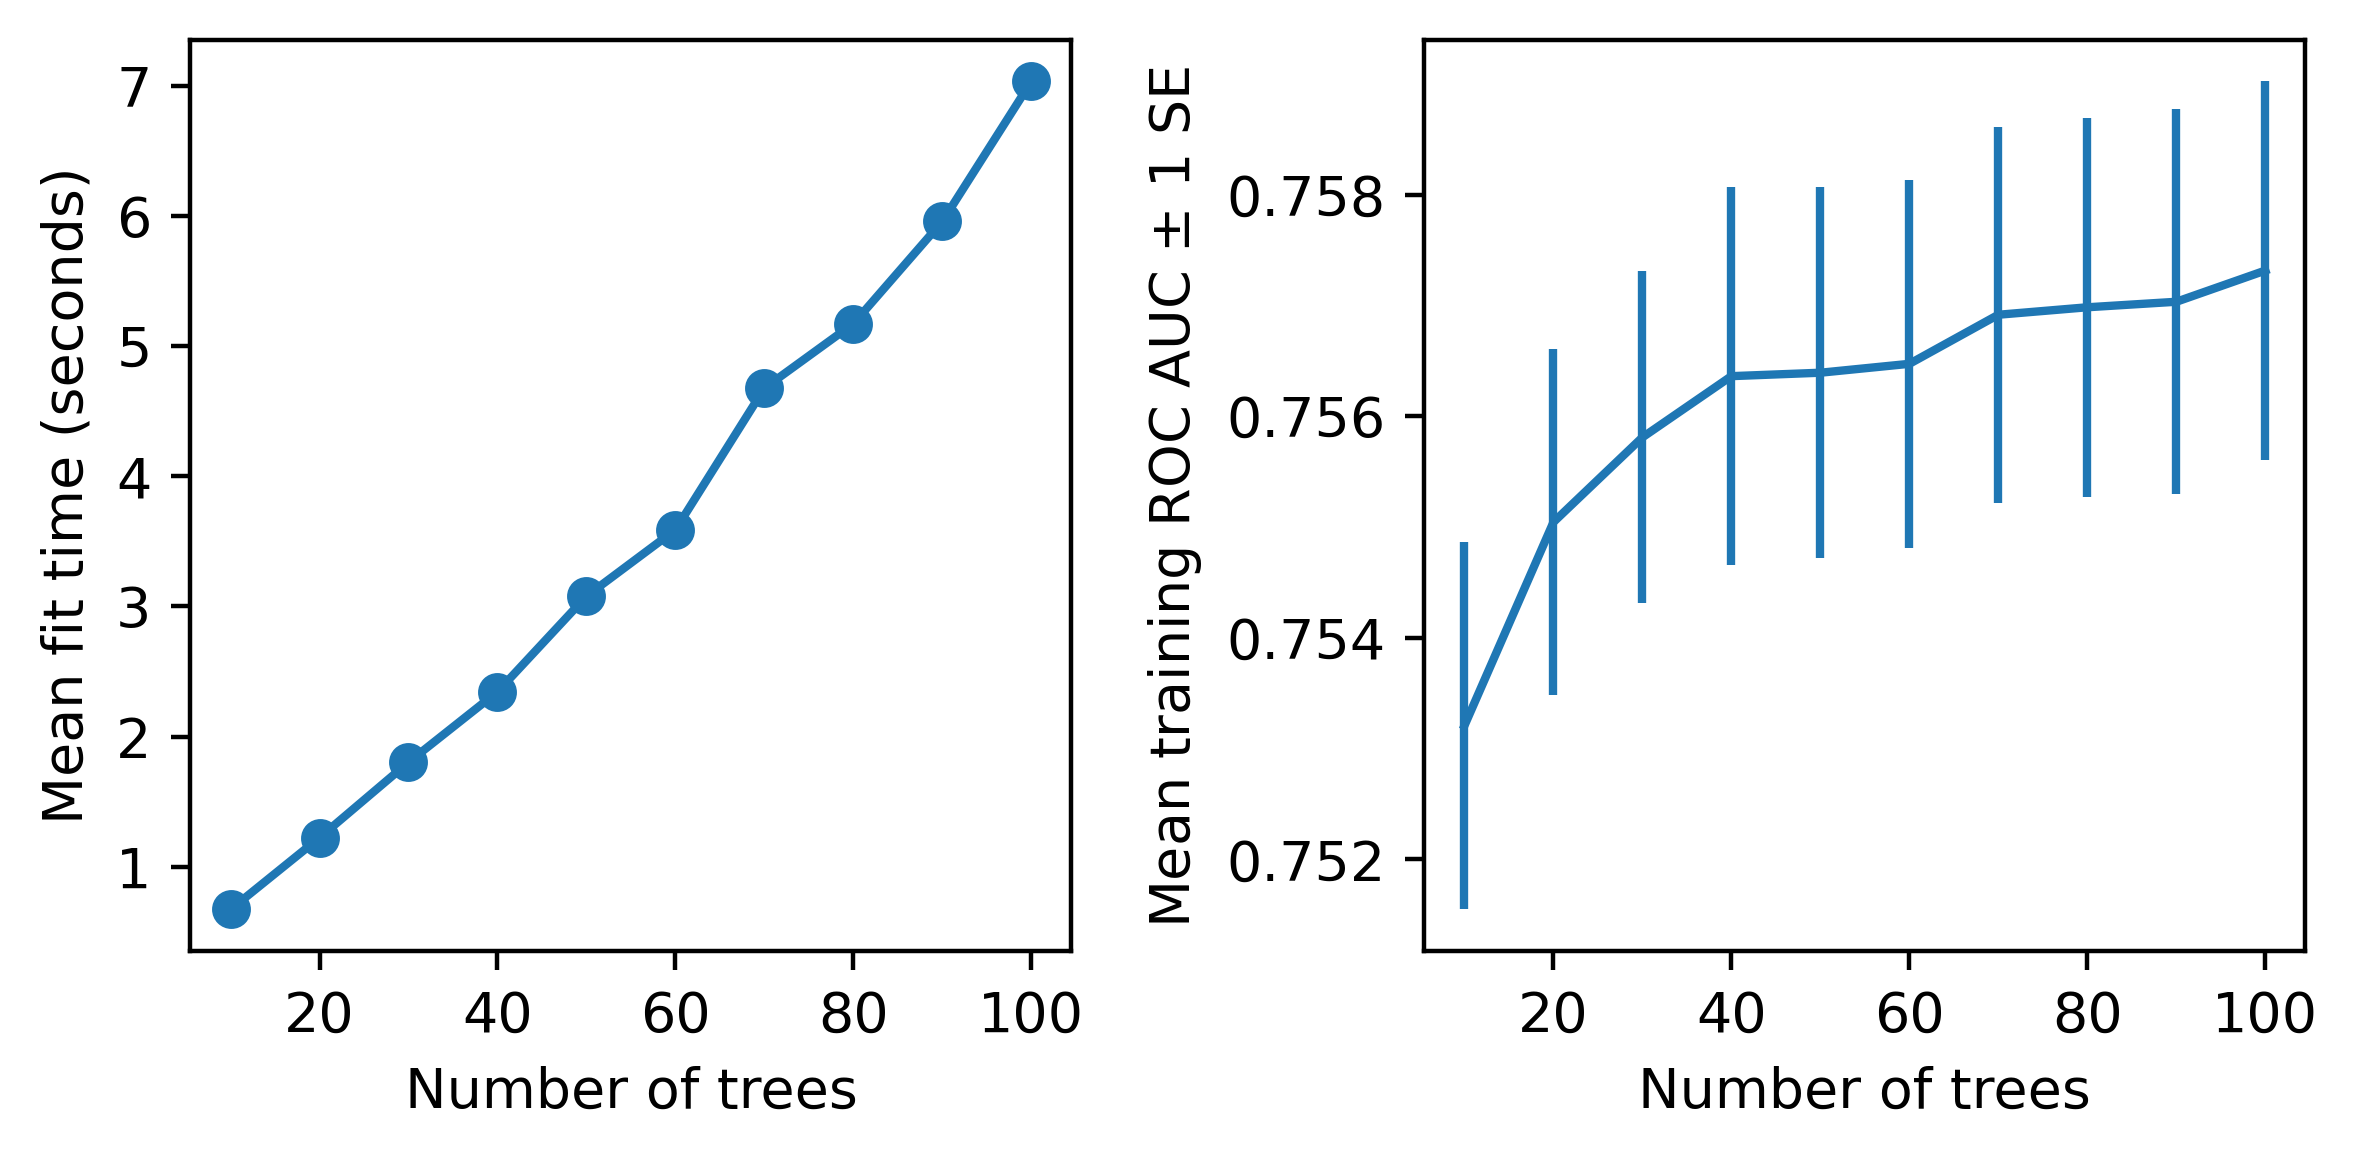

In [32]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3))
axs[0].plot(cv_rf_results_df['param_n_estimators'],
cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
cv_rf_results_df['mean_train_score'],
yerr = cv_rf_results_df['std_train_score'] / np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean training ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

In [33]:
# Check the best hyperparameters from the cross-validation
cv_rf_.best_params_

{'n_estimators': 80}

In [34]:
feature_importance_df = pd.DataFrame({'Importance':cv_rf_.best_estimator_.feature_importances_}, index = features_response[:-1])

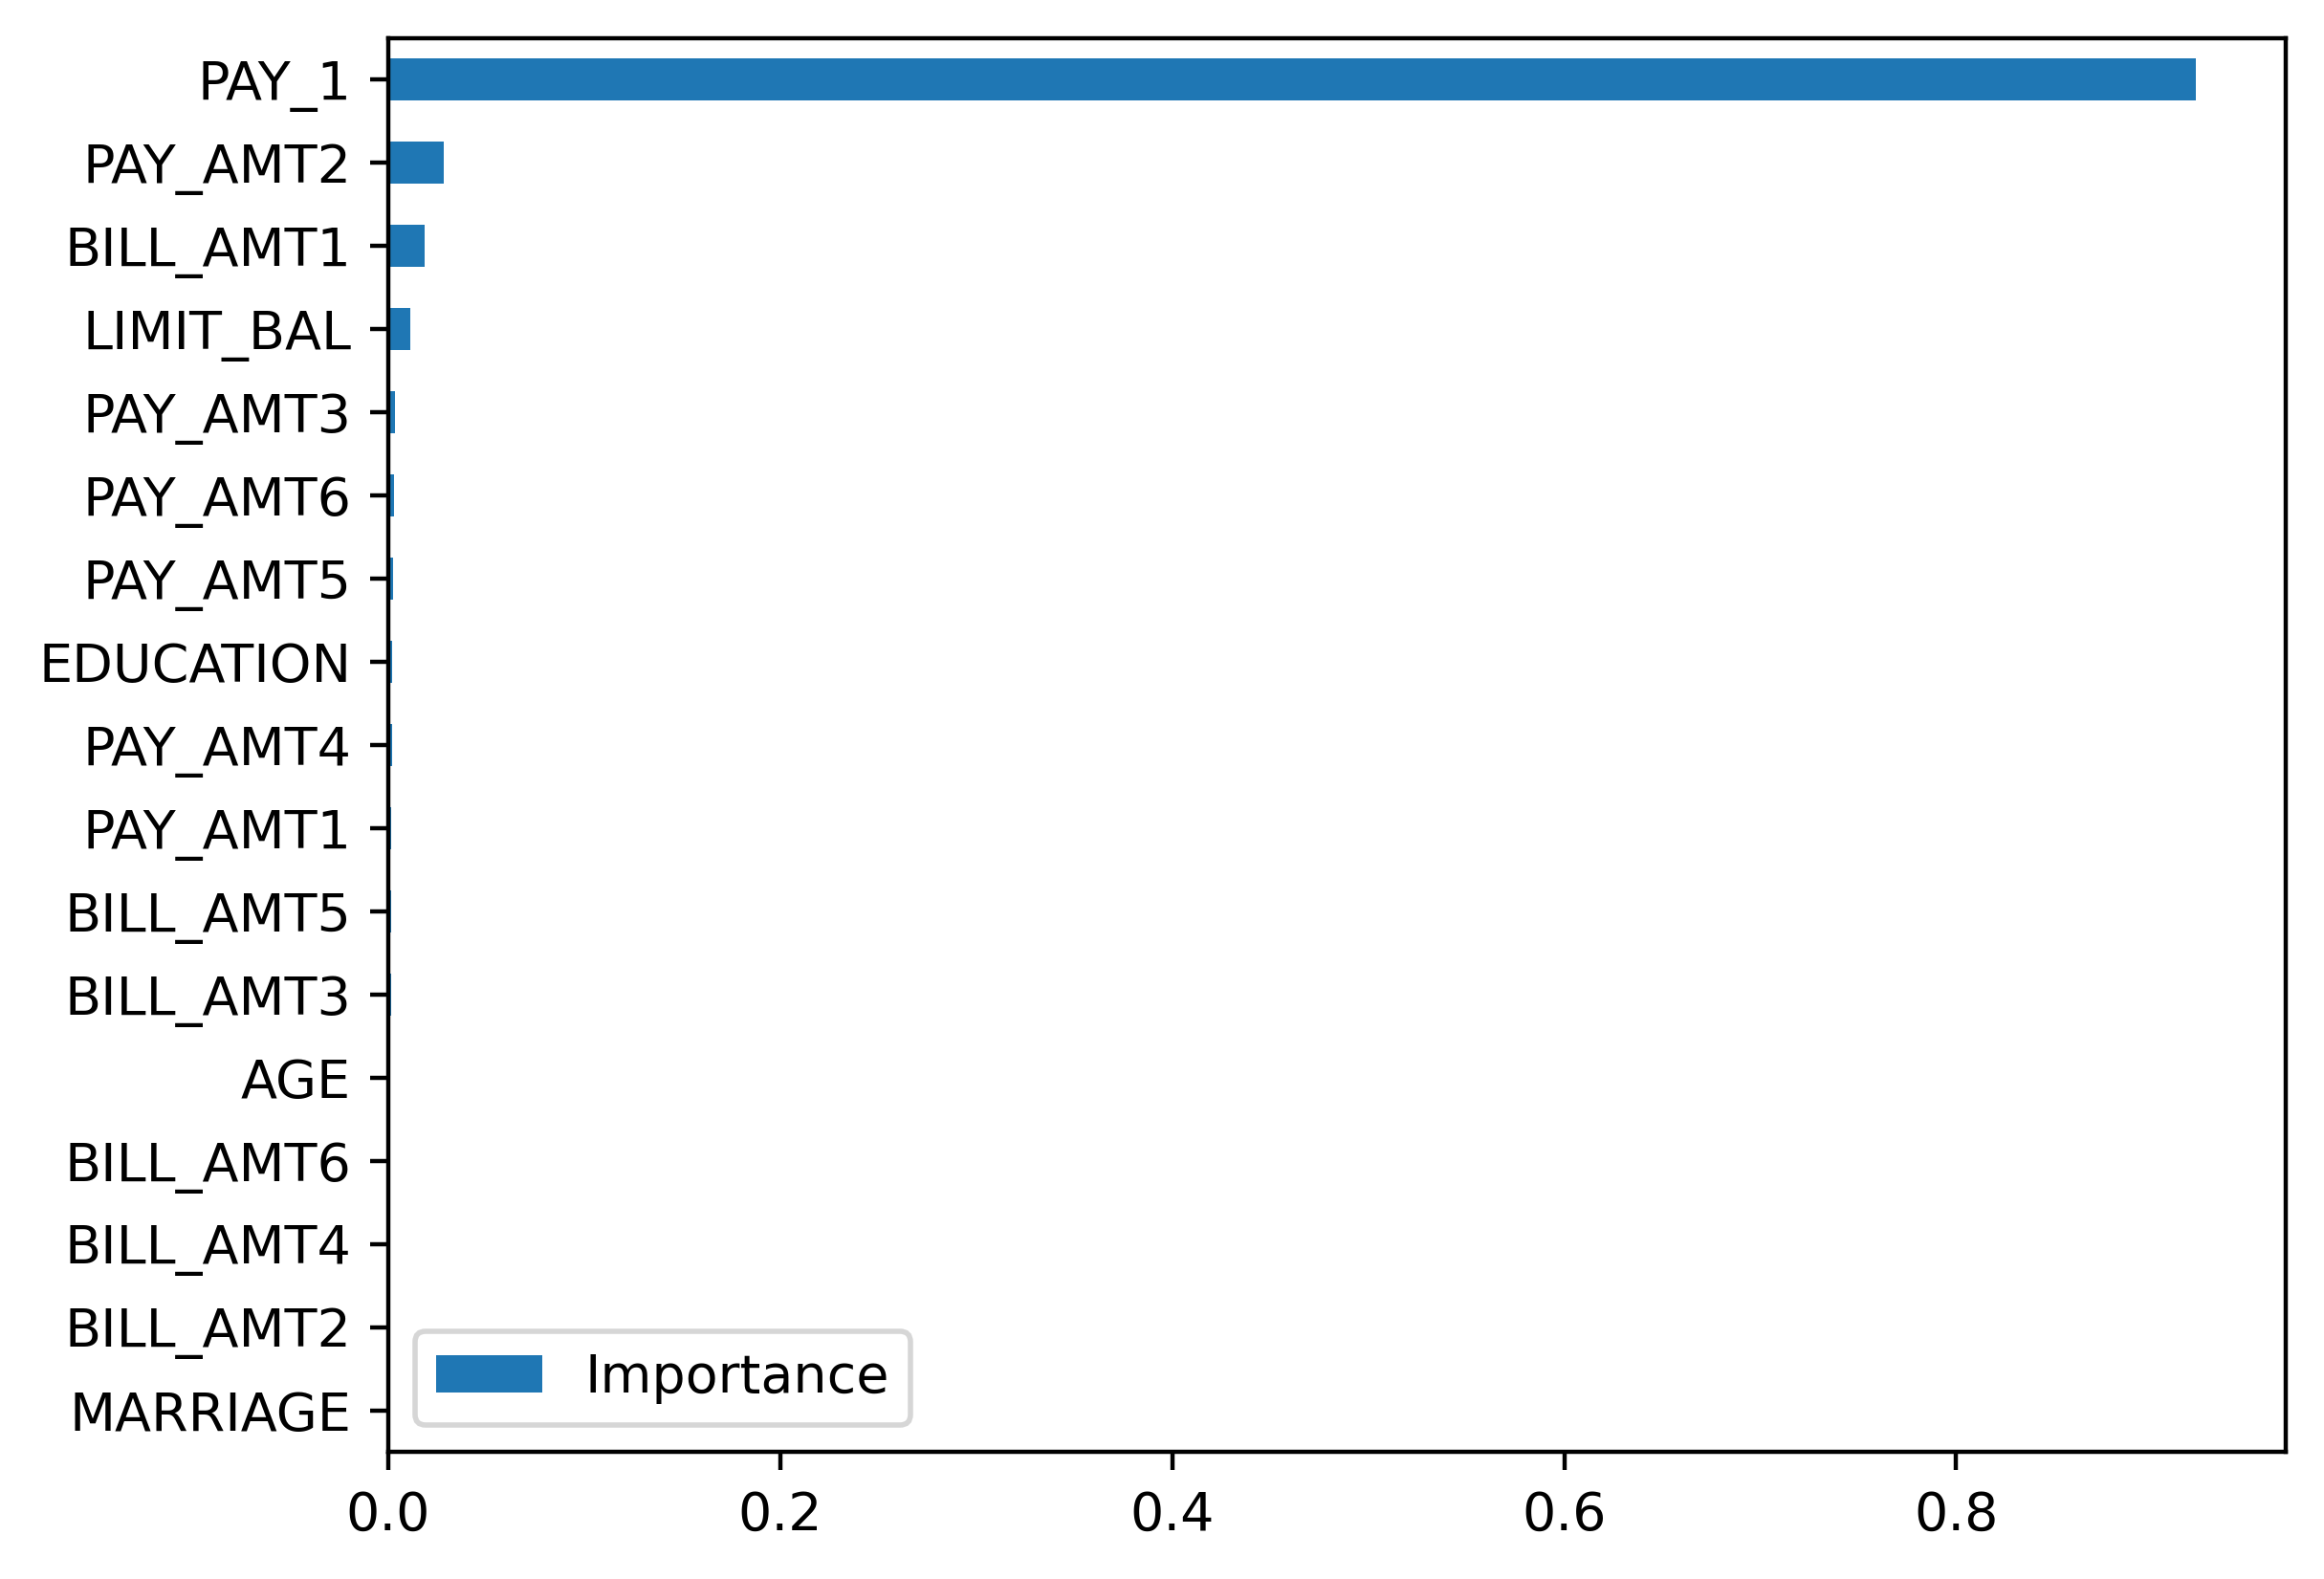

In [35]:
feature_importance_df.sort_values('Importance', ascending = True).plot.barh()
plt.show()

In [36]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [37]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

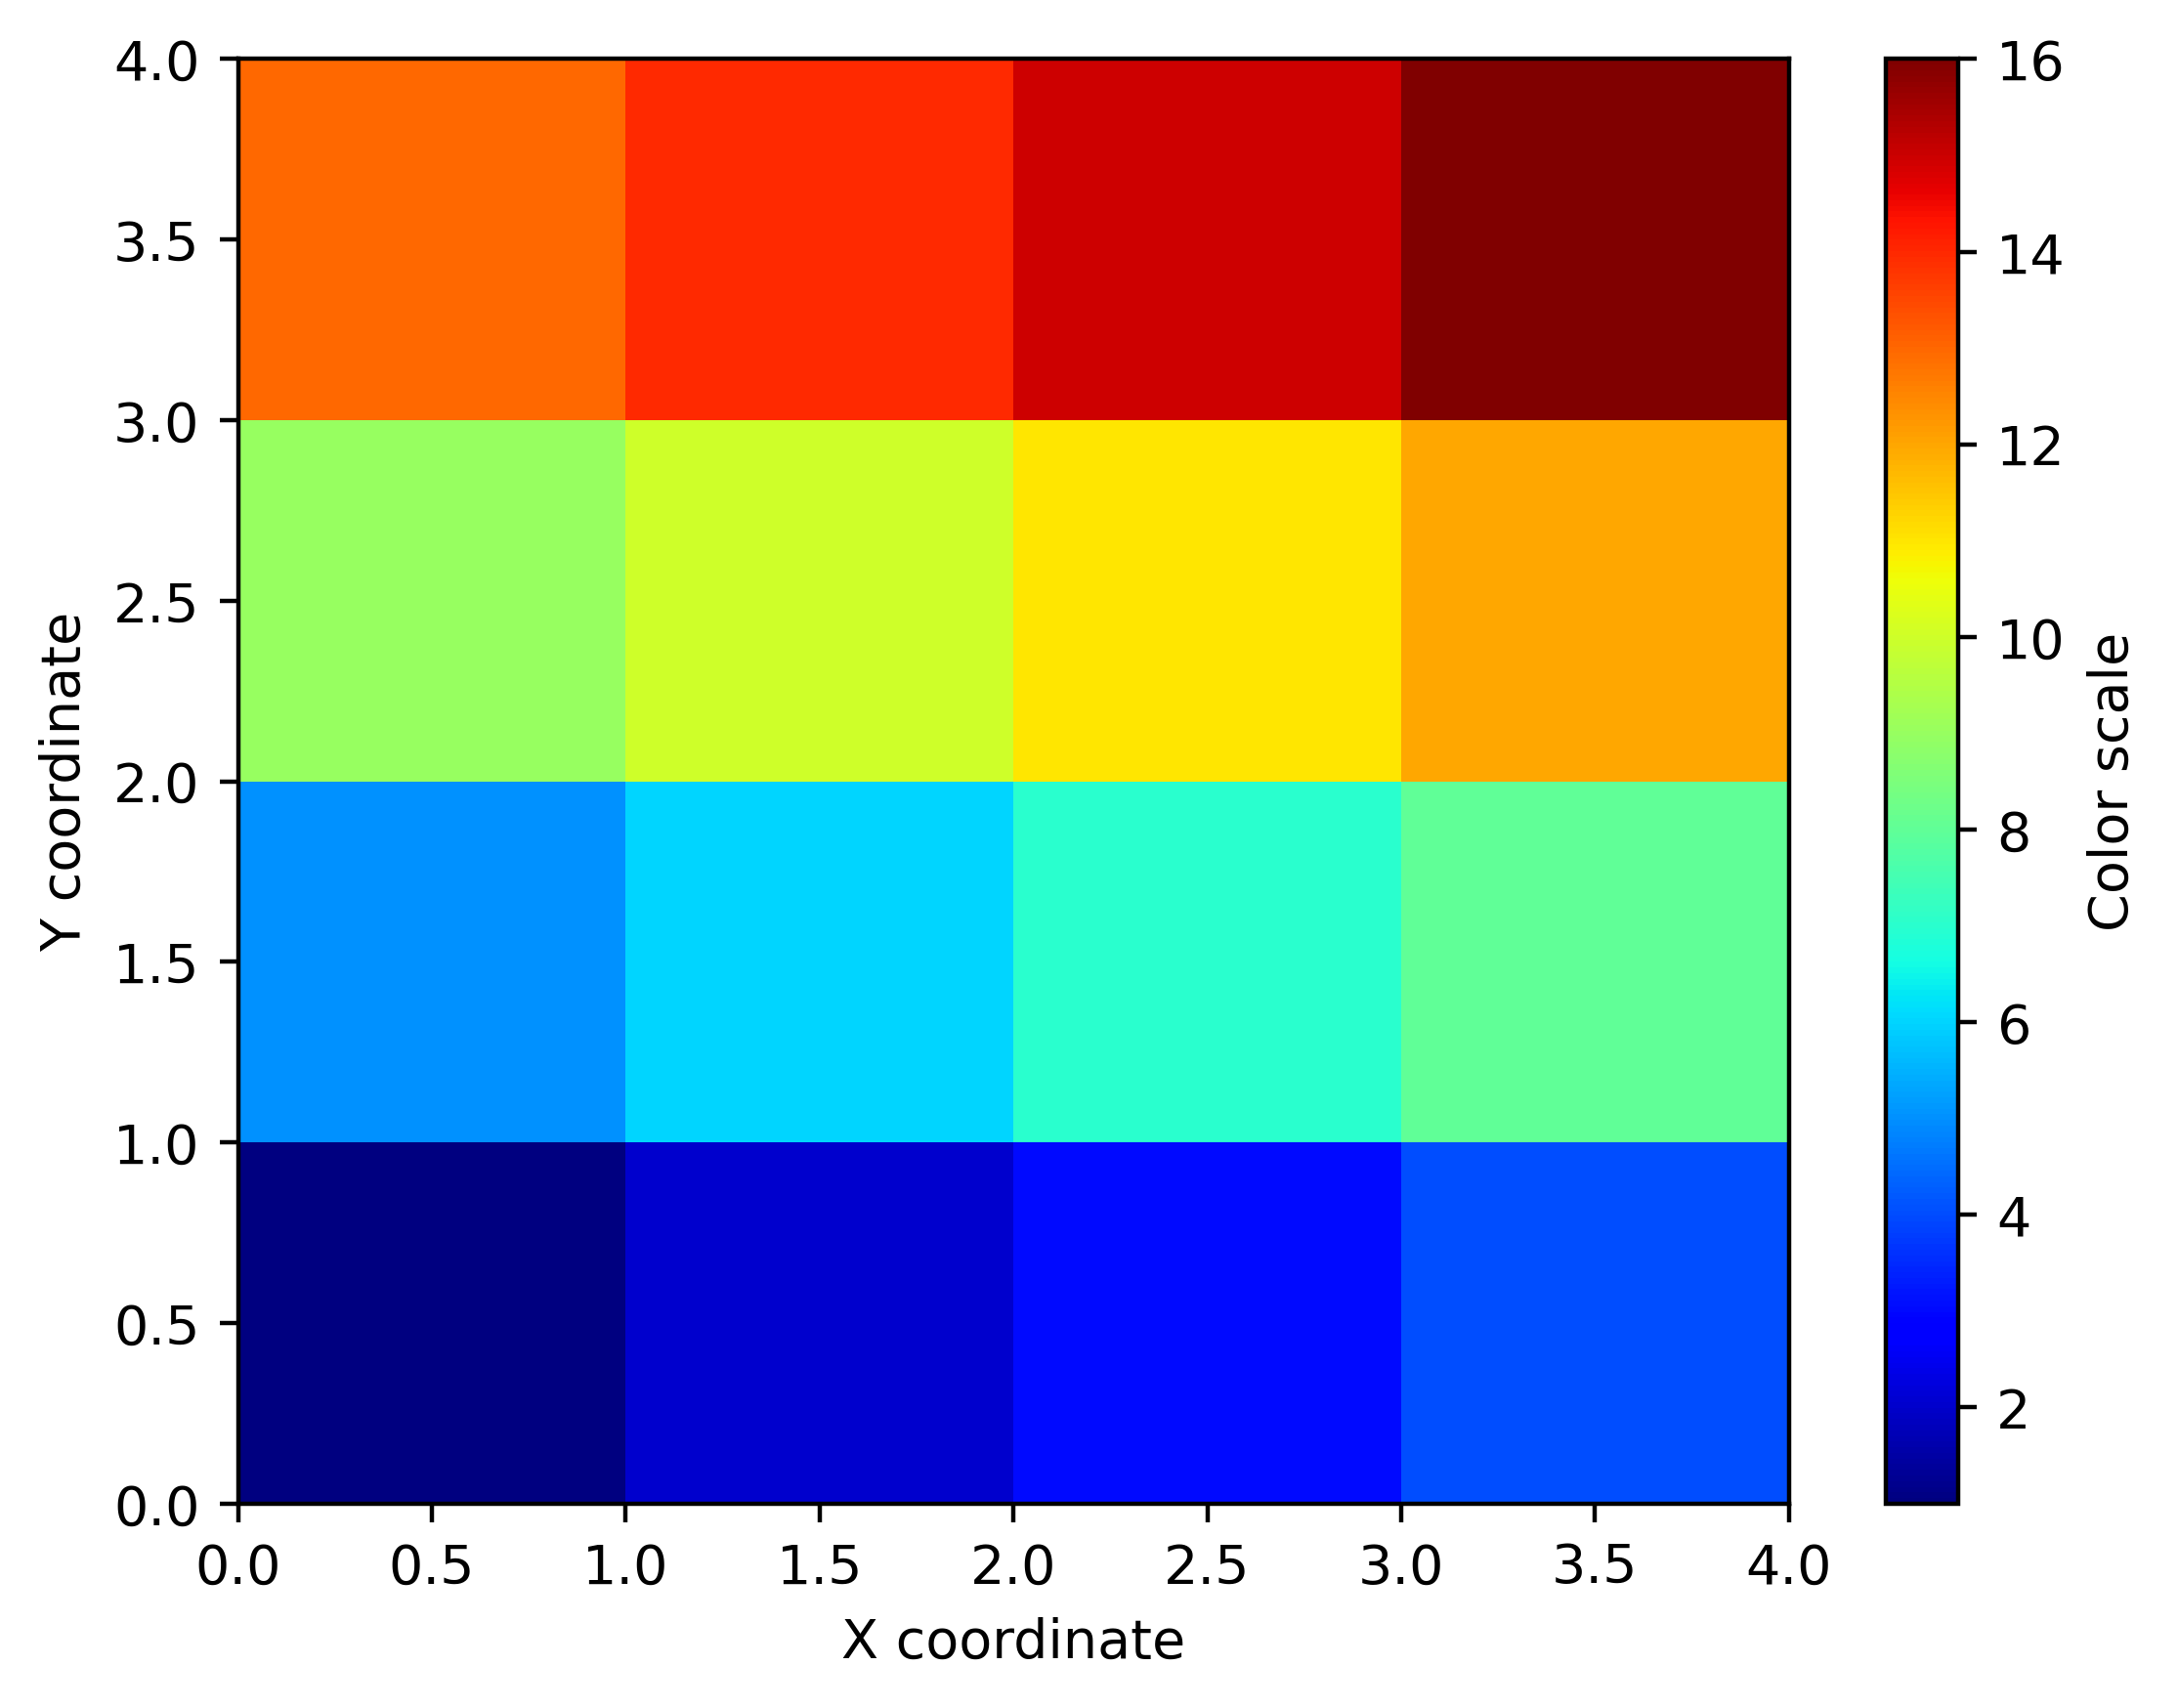

In [39]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example ,z_example, cmap = plt.cm.jet)
plt.colorbar(pcolor_ex, label = 'Color scale')
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
plt.show()

In [40]:
exe_params = {'max_depth':[3,6,9,12], 'n_estimators':[10,50,100,200]}

In [53]:
ex_rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = None, random_state = 4, verbose = 0, warm_start = False, class_weight = None)

In [54]:
ex_cv_rf_ = GridSearchCV(ex_rf, param_grid = exe_params, scoring = 'roc_auc', n_jobs = None, refit = True, cv = 4, verbose = 2, pre_dispatch = '2*n_jobs', error_score = np.nan, return_train_score = True)

In [55]:
ex_cv_rf_.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.9s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.7s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.5s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=3, n_estimators=50; total time=   3.8s
[CV] END .......................max_depth=3, n_estimators=50; total time=   3.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   3.5s
[CV] END .......................max_depth=3, n_estimators=50; total time=   3.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=   6.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   7.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=   6.5s
[CV] END ......................max_depth=3, n_es

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, max_features=None,
                                              n_estimators=10, random_state=4),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [56]:
ex_cv_rf_result_df = pd.DataFrame(ex_cv_rf_.cv_results_)
ex_cv_rf_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.759930,0.142988,0.010000,0.003463,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.734155,0.735947,0.753798,0.756745,0.745161,0.010183,16,0.756831,0.752423,0.748163,0.755412,0.753207,0.003319
1,3.493672,0.256066,0.016004,0.000017,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.736199,0.740404,0.759595,0.760194,0.749098,0.010900,15,0.760667,0.757557,0.751385,0.755961,0.756393,0.003350
2,6.759380,0.531209,0.026004,0.003462,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.736926,0.740830,0.760240,0.762148,0.750036,0.011263,13,0.761552,0.758289,0.752050,0.757368,0.757315,0.003414
3,12.760828,0.888006,0.055988,0.009791,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.736437,0.741280,0.760843,0.761188,0.749937,0.011211,14,0.761279,0.758779,0.752935,0.757141,0.757533,0.003036
4,1.517859,0.312644,0.014000,0.010392,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.753141,0.756704,0.779243,0.764608,0.763424,0.010032,10,0.797309,0.797466,0.792048,0.794990,0.795453,0.002197
5,6.471410,0.653397,0.025998,0.008722,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.756584,0.760868,0.783208,0.767421,0.767020,0.010111,7,0.802559,0.801255,0.796123,0.797308,0.799311,0.002669
6,12.602845,1.025827,0.035997,0.003990,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.756920,0.761847,0.783540,0.770119,0.768107,0.010082,5,0.803295,0.802093,0.797233,0.798340,0.800240,0.002521
7,23.219867,0.368415,0.069989,0.003460,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.757009,0.763008,0.783642,0.770422,0.768521,0.009940,4,0.803852,0.803070,0.797950,0.799220,0.801023,0.002495
8,1.973807,0.194077,0.009995,0.003466,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.754000,0.755317,0.777287,0.763571,0.762544,0.009269,11,0.859191,0.862153,0.856442,0.853663,0.857862,0.003155
9,8.945176,0.486109,0.027990,0.003998,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.760081,0.762067,0.783125,0.771993,0.769317,0.009161,3,0.870156,0.876319,0.869496,0.865232,0.870301,0.003955


In [58]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [59]:
cm_rf = plt.cm.jet

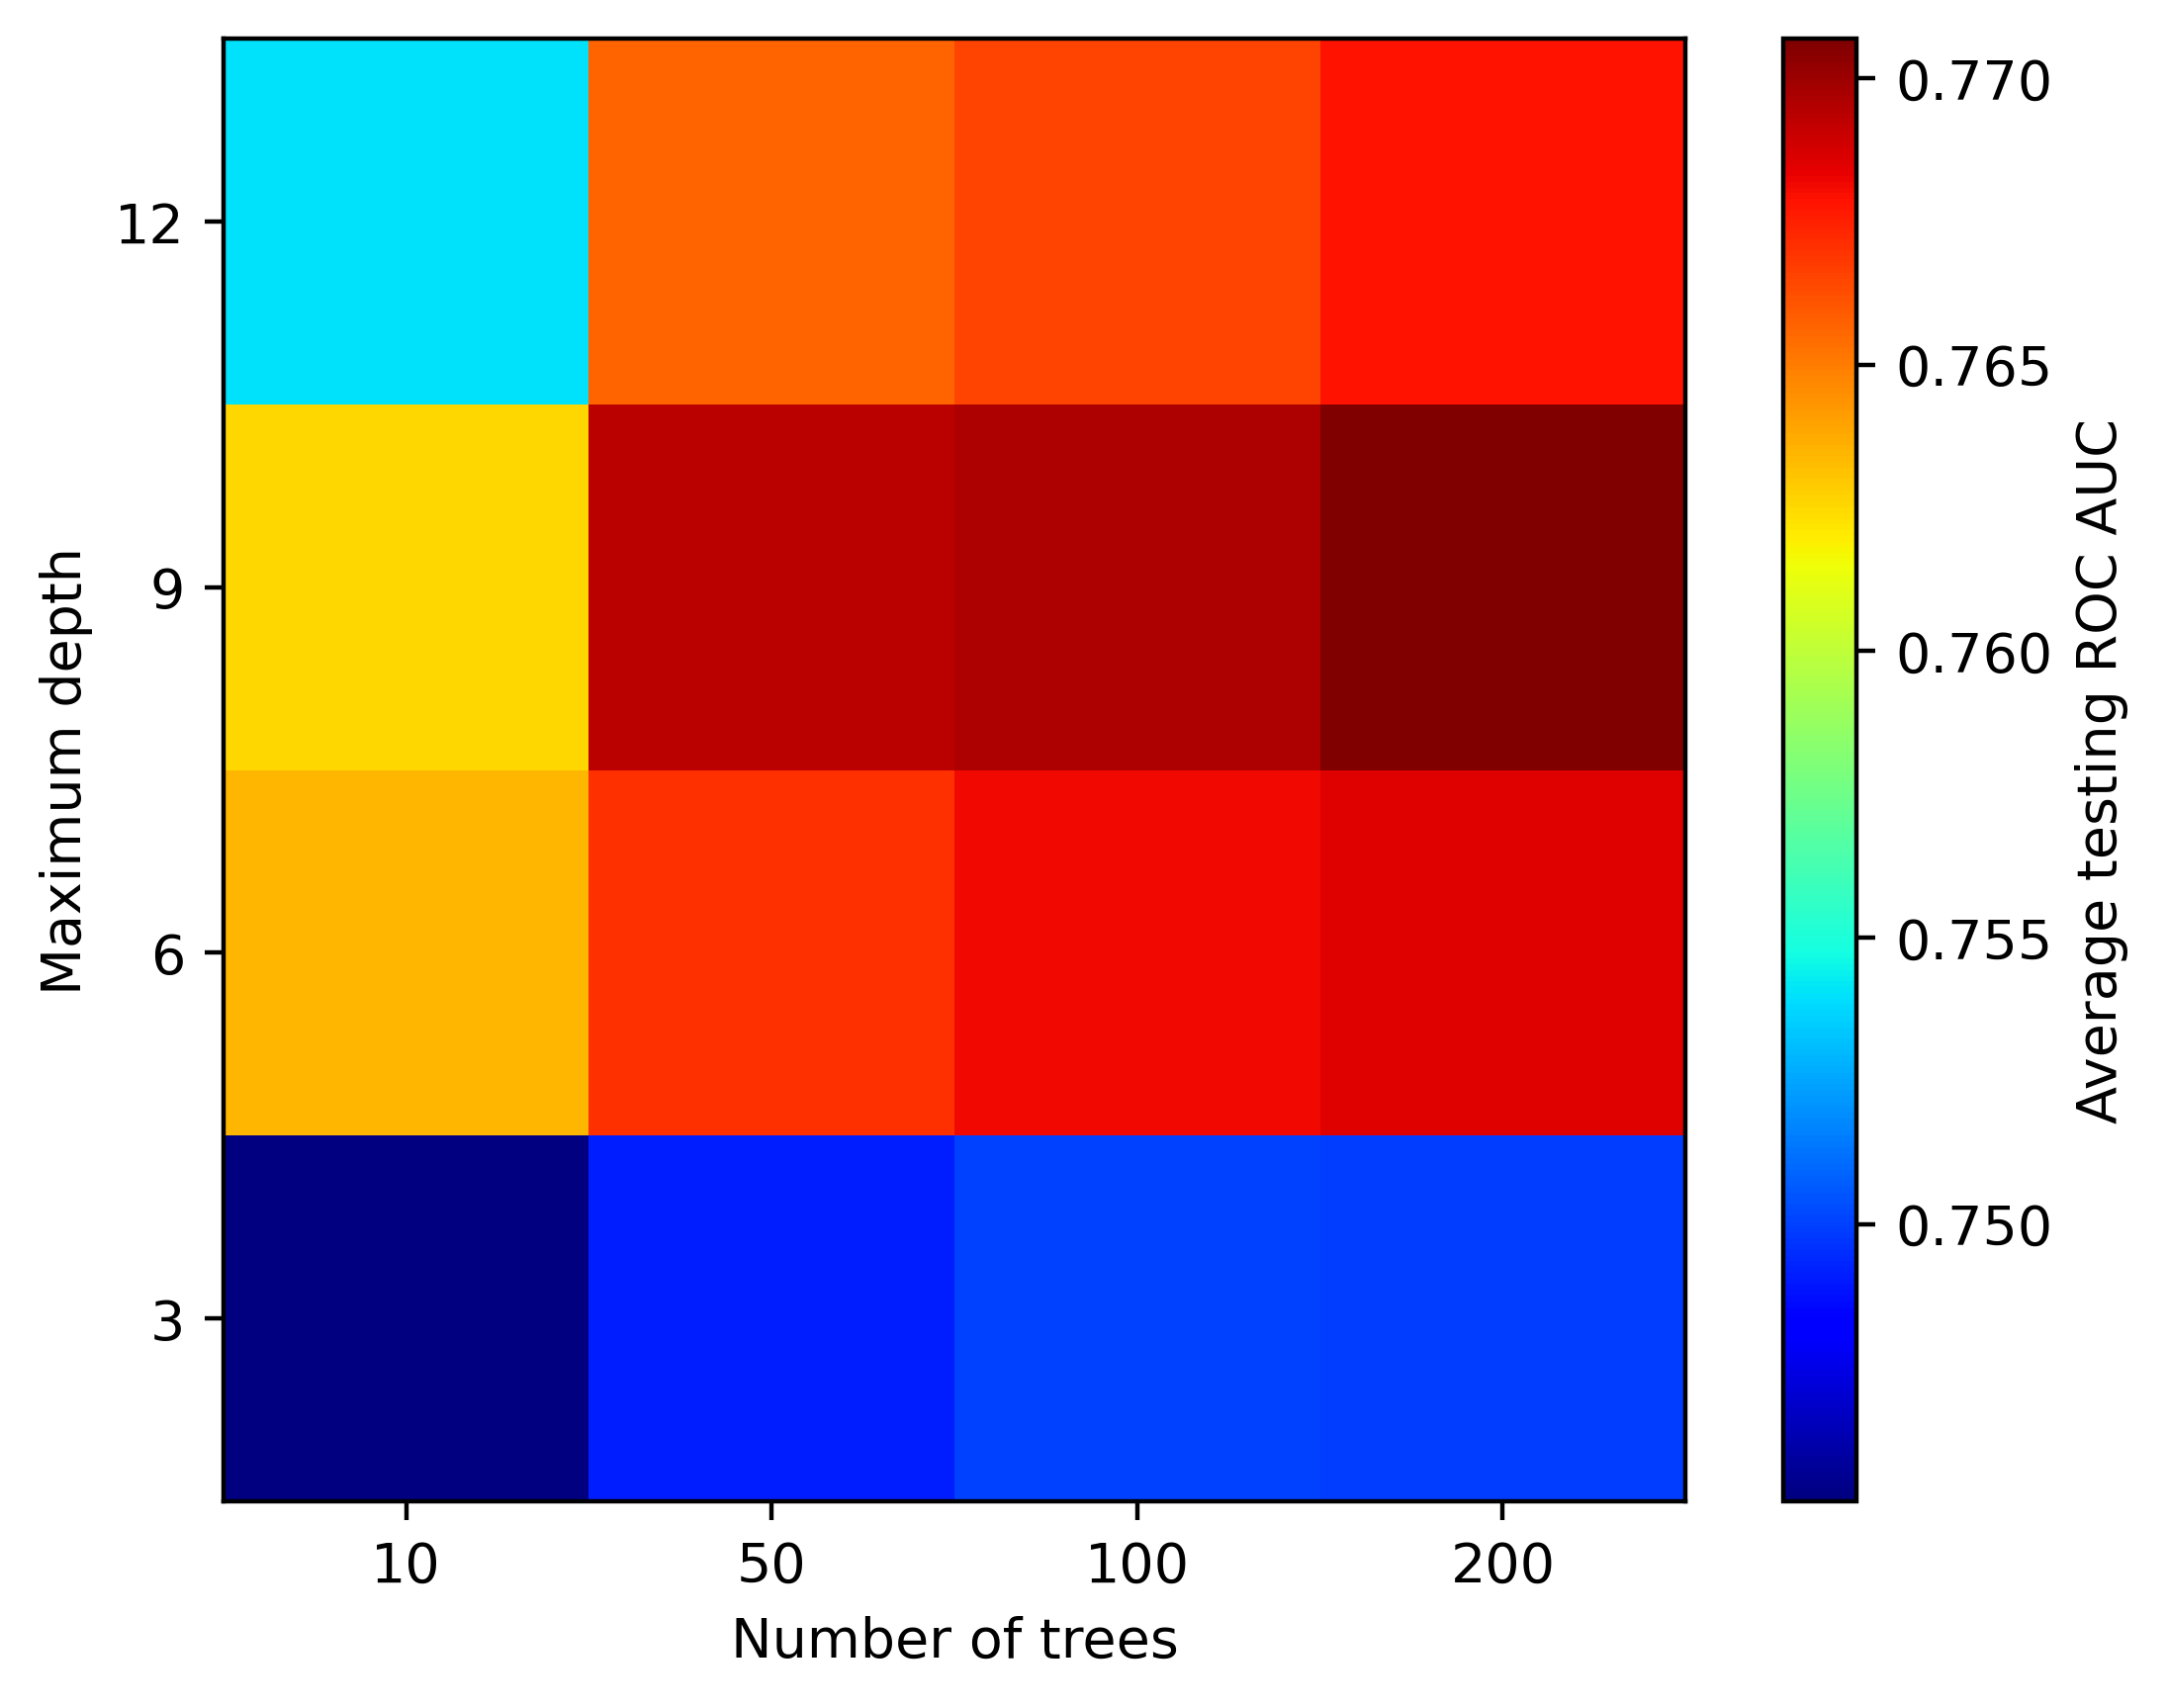

In [66]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(
    xx_rf, yy_rf,
    ex_cv_rf_result_df['mean_test_score'].values.reshape((4,4)),
    cmap = cm_rf)
plt.colorbar(pcolor_graph, label = 'Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels(
    [str(tick_label) for tick_label in exe_params['n_estimators']])
ax_rf.set_yticklabels(
    [str(tick_label) for tick_label in exe_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')
plt.show()

In [67]:
ex_cv_rf_.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [68]:
feat_imp_df = pd.DataFrame({'Feature name':features_response[:-1], 'Importance':ex_cv_rf_.best_estimator_.feature_importances_})

In [77]:
feat_imp_df.sort_values('Importance', ascending = False)
feat_imp_df

,Feature name,Importance
0,LIMIT_BAL,0.045676
1,EDUCATION,0.008393
2,MARRIAGE,0.004790
3,AGE,0.034394
4,PAY_1,0.535584
5,BILL_AMT1,0.054989
6,BILL_AMT2,0.025799
7,BILL_AMT3,0.028513
8,BILL_AMT4,0.024363
9,BILL_AMT5,0.023844
